## A. Descarga del Conjunto de Datos 

En esta primera parte, hacemos descargamos el .csv de Kaggle y lo guardamos en una variable llamada df (DataFrame)

In [1]:
!python.exe -m pip install -q --upgrade pip

In [2]:
!pip install -q --upgrade ipywidgets

In [3]:
# -q = quiet installation
!pip install -q kagglehub 

In [4]:
import kagglehub

# importamos el dataset
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

## B. Lectura del Dataset

En esta sección vamos a leer el .csv para guardarlo en una variable df (DataFrame) y poder manipularlo para extraer información

In [5]:
pip install -q pandas

Note: you may need to restart the kernel to use updated packages.


Utilizar Pandas para cargar el dataset en un DataFrame

In [5]:
import pandas as pd

# read the csv
df = pd.read_csv(f"{path}/Student_Performance.csv")

### Explorar la estructura del dataset (filas, columnas, tipos de variables)
#### Filas

In [6]:
# first rows
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [7]:
# last rows
df.tail(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9990,9,43,No,7,4,40.0
9991,5,97,Yes,7,4,83.0
9992,9,52,No,9,7,50.0
9993,9,58,Yes,7,7,55.0
9994,6,46,Yes,8,0,39.0
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


#### columnas

In [8]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

#### forma
Esto nos sirve para ver las dimensiones, en este caso, 10000 filas x 6 columnas

In [9]:
df.shape

(10000, 6)

#### tipos de datos

In [10]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

#### resumen del DF

In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


### estadísticas descriptivas: media, desviación estándar, valores mínimos y máximos

In [12]:
df.describe()  

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## C. Análisis de Características

In [14]:
!pip install -q matplotlib

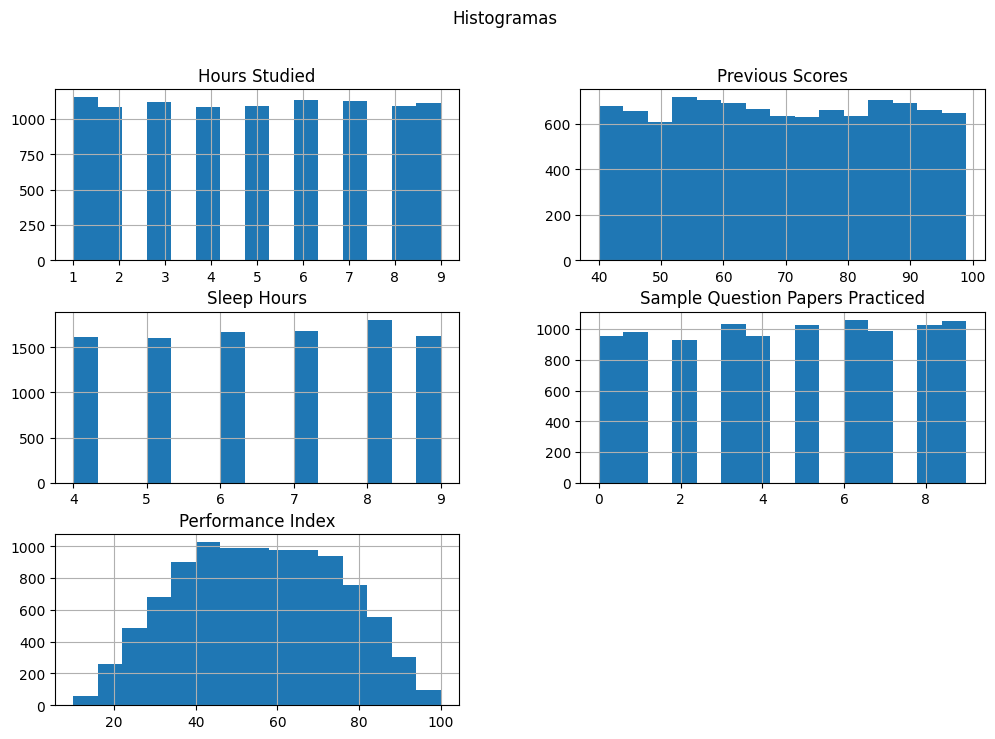

In [13]:
import matplotlib.pyplot as plt

# histogramas para variables numéricas
num_cols = df.select_dtypes(include='number').columns
df[num_cols].hist(figsize=(12, 8), bins=15)
plt.suptitle("Histogramas")
plt.show()

In [16]:
!pip install -q seaborn

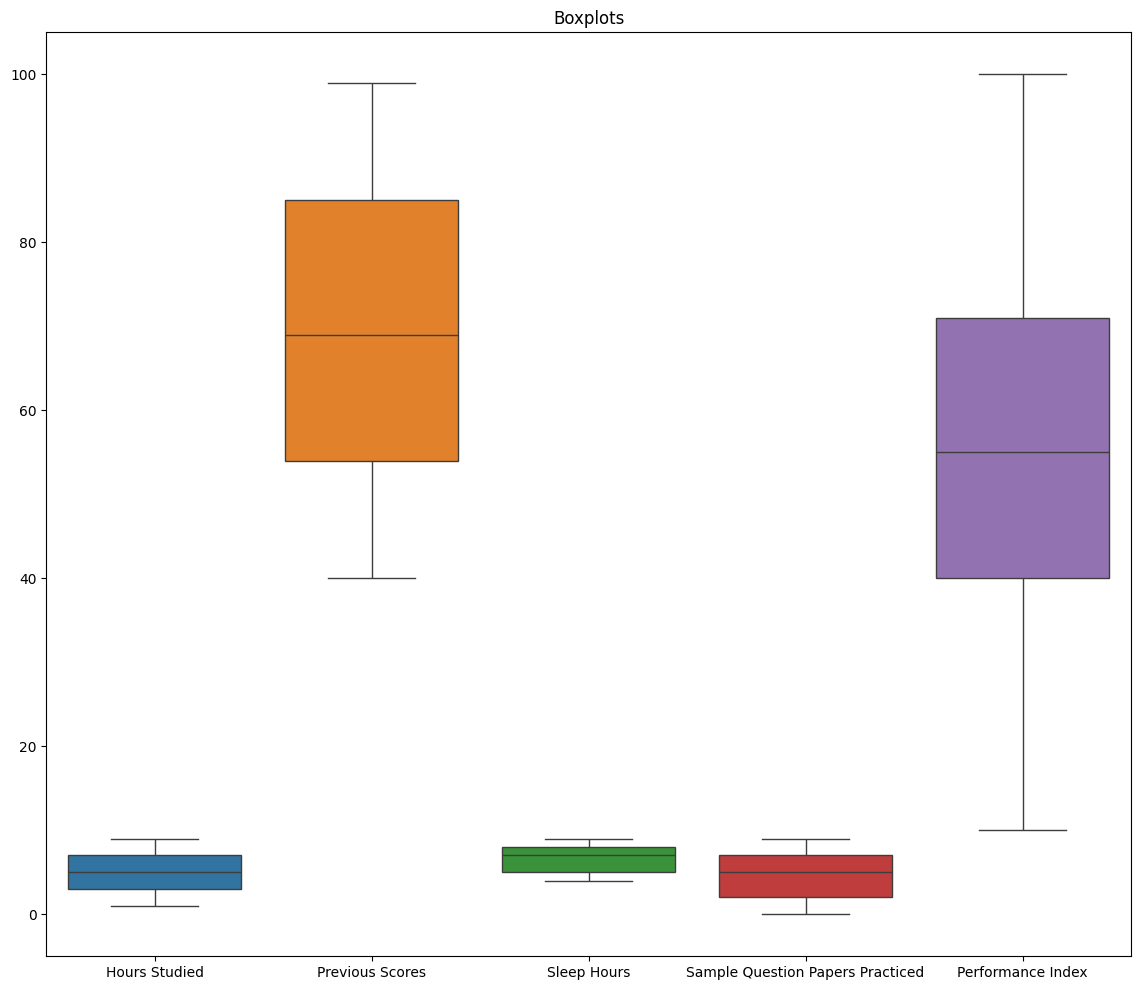

In [14]:
import seaborn as sns

# boxplots 
plt.figure(figsize=(14, 12))
sns.boxplot(data=df[num_cols])
plt.title("Boxplots")
plt.show()

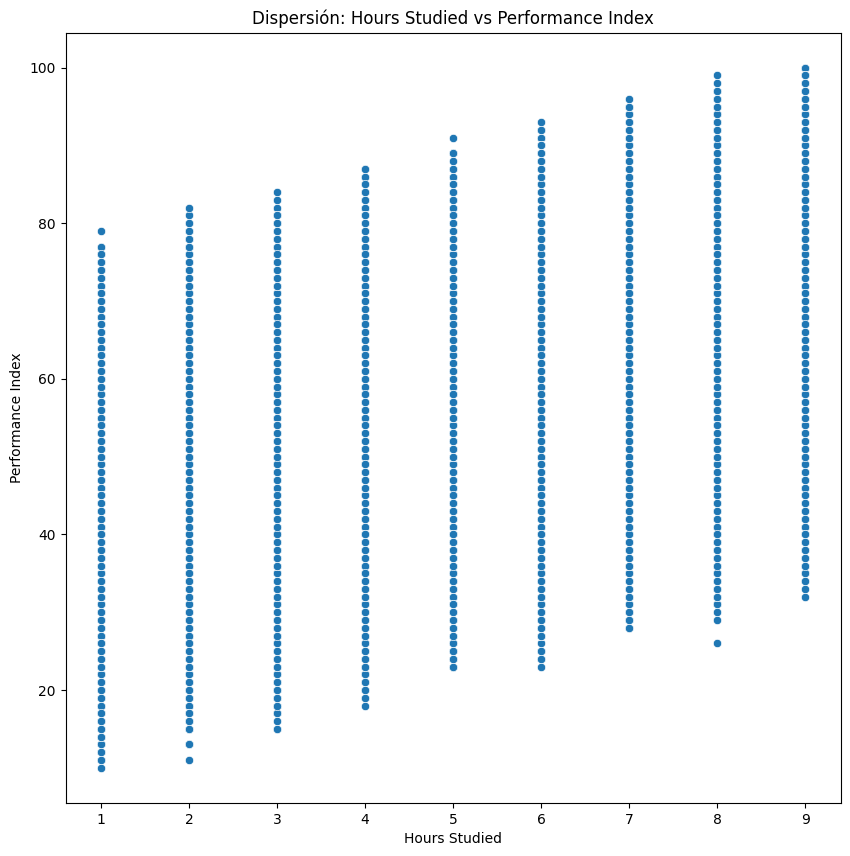

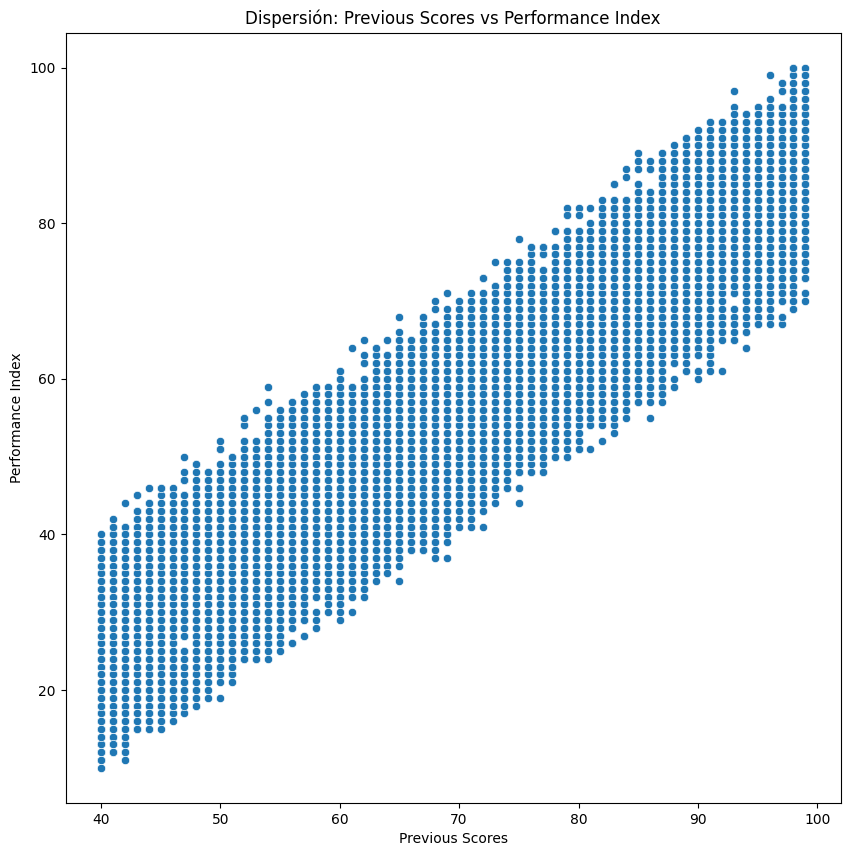

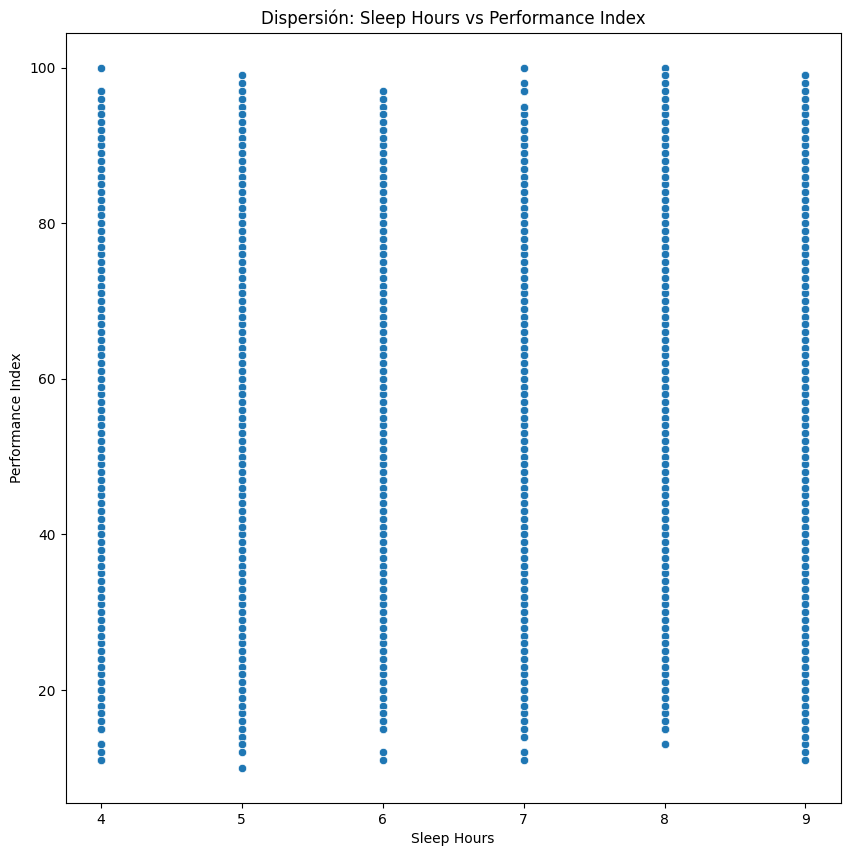

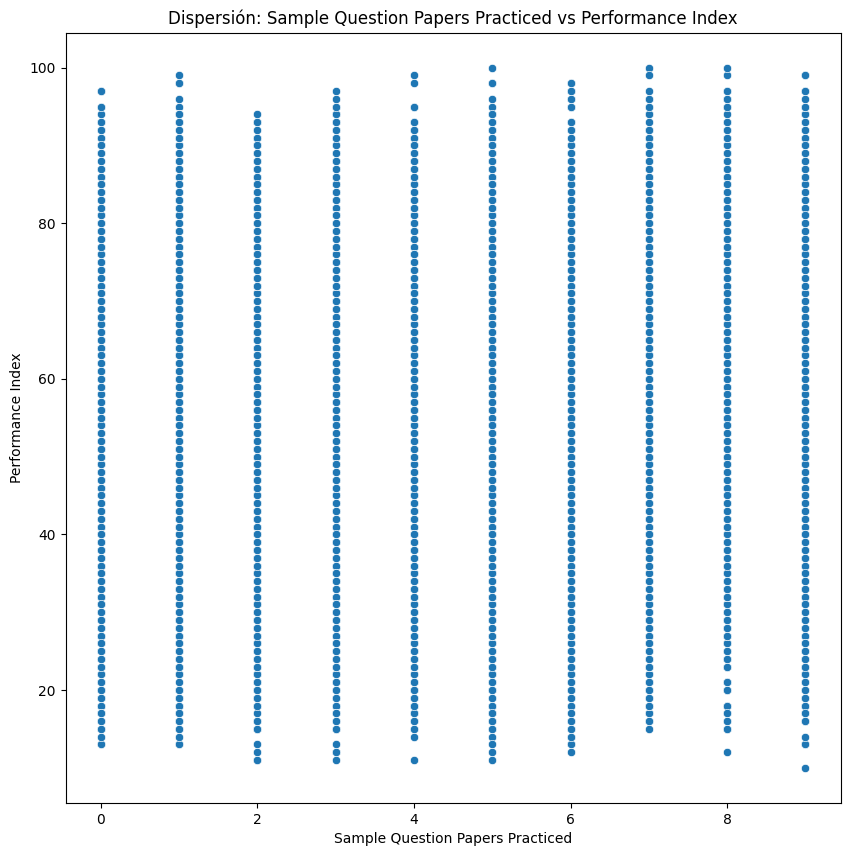

In [15]:
# diagramas de dispersión vs el indice de desempeño
target_col = 'Performance Index' 
for col in num_cols:
    if col != target_col:
        plt.figure(figsize=(10,10))
        sns.scatterplot(x=df[col], y=df[target_col])
        plt.title(f"Dispersión: {col} vs {target_col}")
        plt.show()

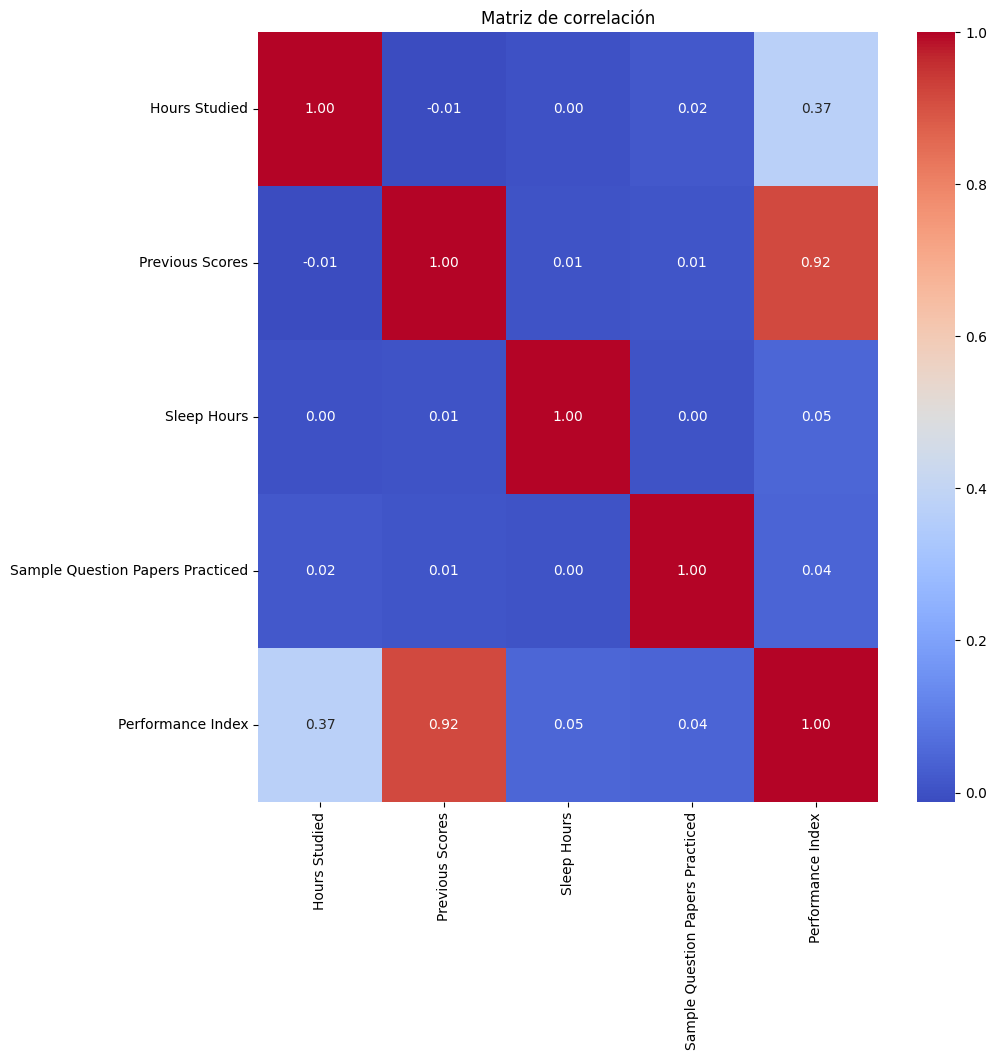

In [16]:
# matriz de correlación y heatmap
corr = df[num_cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

In [17]:
# detección de outliers usando IQR
outliers = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    out = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    if not out.empty:
        outliers[col] = out.shape[0]

# reporte de outliers
if outliers:
    print("Cantidad de outliers detectados por columna:")
    for col, count in outliers.items():
        print(f"{col}: {count}")
else:
    print("No se detectaron outliers significativos.")

No se detectaron outliers significativos.


##  D. División del Dataset

In [21]:
!pip install -q numpy

In [18]:
import numpy as np

# muestreo Aleatorio 
# mezclar aleatoriamente los índices
shuffled_indices = np.random.permutation(len(df))

In [19]:
# calcular tamaños
train_size = int(0.7 * len(df)) #training
val_size   = int(0.15 * len(df)) # validation
test_size  = len(df) - train_size - val_size  # testing

# divisiones
train_idx = shuffled_indices[:train_size]
val_idx   = shuffled_indices[train_size:train_size+val_size]
test_idx  = shuffled_indices[train_size+val_size:]

train_random = df.iloc[train_idx]
val_random   = df.iloc[val_idx]
test_random  = df.iloc[test_idx]

print("Random Sampling:")
print(f"Train: {train_random.shape}, Validation: {val_random.shape}, Test: {test_random.shape}")


Random Sampling:
Train: (7000, 6), Validation: (1500, 6), Test: (1500, 6)


In [32]:
k = 5  # número de bins (puedes ajustar)
df["estrato"] = pd.qcut(df["Performance Index"], q=k, labels=False, duplicates="drop")

# inicializar listas para índices
train_idx, val_idx, test_idx = [], [], []

In [31]:
for s, group in df.groupby("estrato"):
    idx = group.index.to_numpy()
    np.random.shuffle(idx)   # mezclar índices dentro del estrato
    
    n = len(idx)
    n_train = int(0.70 * n)
    n_val   = int(0.15 * n)
    # el resto va a test
    n_test  = n - n_train - n_val
    
    train_idx.extend(idx[:n_train])
    val_idx.extend(idx[n_train:n_train+n_val])
    test_idx.extend(idx[n_train+n_val:])

# armar los datasets
train_strat = df.loc[train_idx].drop(columns="estrato")
val_strat   = df.loc[val_idx].drop(columns="estrato")
test_strat  = df.loc[test_idx].drop(columns="estrato")

print("Stratified Sampling:")
print(f"Train: {train_strat.shape}, Validation: {val_strat.shape}, Test: {test_strat.shape}")

Stratified Sampling:
Train: (6996, 6), Validation: (1497, 6), Test: (1507, 6)


##  E. Implementación de Regresión Linear

In [20]:
import numpy as np

TARGET = "Performance Index"  # variable a predecir

# excluir target y columnas no numéricas
feat_cols = [
    c for c in train_random.columns
    if c != TARGET and train_random[c].dtype != "object"
]


# a) separar X e y
X_train = train_random[feat_cols].to_numpy(dtype=float); y_train = train_random[TARGET].to_numpy(dtype=float).ravel()
X_val   = val_random[feat_cols].to_numpy(dtype=float);   y_val   = val_random[TARGET].to_numpy(dtype=float).ravel()
X_test  = test_random[feat_cols].to_numpy(dtype=float);  y_test  = test_random[TARGET].to_numpy(dtype=float).ravel()

# b) estandarizar con media y std de train
mu = X_train.mean(axis=0)
sigma = X_train.std(axis=0, ddof=0); sigma[sigma == 0] = 1.0

X_train_std = (X_train - mu) / sigma
X_val_std   = (X_val   - mu) / sigma
X_test_std  = (X_test  - mu) / sigma

# c) añadir columna de unos (bias)
X_train_b = np.c_[np.ones((X_train_std.shape[0], 1)), X_train_std]
X_val_b   = np.c_[np.ones((X_val_std.shape[0],   1)), X_val_std]
X_test_b  = np.c_[np.ones((X_test_std.shape[0],  1)), X_test_std]


In [21]:
def batch_gradient_descent(X, y, lr=0.05, n_iter=5000, X_val=None, y_val=None):
    m, n = X.shape
    theta = np.zeros(n)
    hist_train, hist_val = [], []

    for _ in range(n_iter):
        # forward
        y_pred = X @ theta
        err = y_pred - y

        # gradiente y paso
        grad = (X.T @ err) / m
        theta -= lr * grad

        # registrar MSE train
        hist_train.append((err**2).mean())

        # registrar MSE val (si se pasa)
        if X_val is not None:
            e_val = (X_val @ theta) - y_val
            hist_val.append((e_val**2).mean())

        # corte por divergencia numérica
        if not np.isfinite(theta).all():
            break

    return theta, np.array(hist_train), (np.array(hist_val) if X_val is not None else None)


In [83]:
theta, hist_train, hist_val = batch_gradient_descent(
    X_train_b, y_train, lr=0.05, n_iter=750,
    X_val=X_val_b, y_val=y_val
)

def mse(X, y, th):
    e = X @ th - y
    return (e**2).mean()

mse_train = mse(X_train_b, y_train, theta)
mse_val   = mse(X_val_b,   y_val,   theta)
mse_test  = mse(X_test_b,  y_test,  theta)

print("MSE finales:")
print(f"  train = {mse_train:.4f}")
print(f"  val   = {mse_val:.4f}")
print(f"  test  = {mse_test:.4f}")

print("\nConvergencia (MSE train):")
print(f"  primera iter = {hist_train[0]:.4f}")
print(f"  última  iter = {hist_train[-1]:.4f}")


MSE finales:
  train = 4.3204
  val   = 3.9227
  test  = 4.2173

Convergencia (MSE train):
  primera iter = 3412.8316
  última  iter = 4.3204


In [84]:
yhat_mean_train = np.full_like(y_train, y_train.mean())
yhat_mean_val   = np.full_like(y_val,   y_train.mean())
yhat_mean_test  = np.full_like(y_test,  y_train.mean())

mse_bl_train = ((yhat_mean_train - y_train)**2).mean()
mse_bl_val   = ((yhat_mean_val   - y_val)**2).mean()
mse_bl_test  = ((yhat_mean_test  - y_test)**2).mean()

print("Baseline (media de y_train) MSE:")
print(f"  train = {mse_bl_train:.4f}")
print(f"  val   = {mse_bl_val:.4f}")
print(f"  test  = {mse_bl_test:.4f}")


Baseline (media de y_train) MSE:
  train = 367.6681
  val   = 378.2753
  test  = 366.5217


## F. Evaluación del Modelo

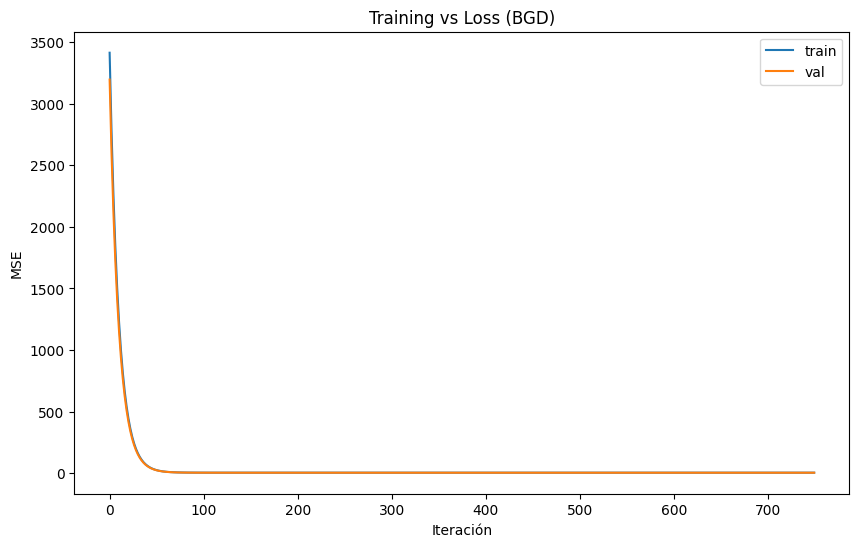

In [85]:
plt.figure(figsize=(10,6))  # ancho=10, alto=6 pulgadas (ajusta a tu gusto)

plt.plot(hist_train, label="train")
if hist_val is not None and len(hist_val) == len(hist_train):
    plt.plot(hist_val, label="val")

plt.xlabel("Iteración")
plt.ylabel("MSE")
plt.title("Training vs Loss (BGD)")
plt.legend()
plt.show()

## G. Análisis de resultados

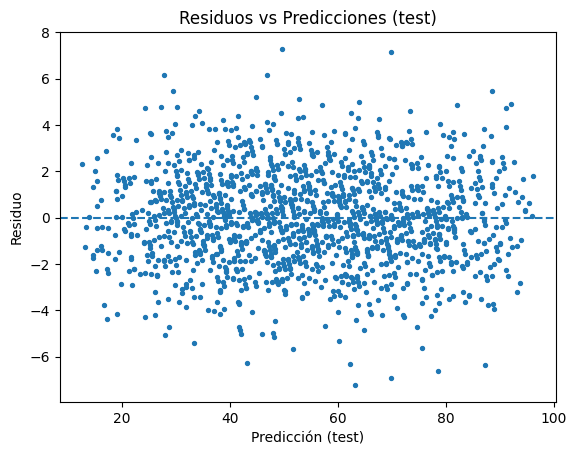

In [87]:
yhat_test = X_test_b @ theta
resid = y_test - yhat_test


plt.scatter(yhat_test, resid, s=8)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicción (test)")
plt.ylabel("Residuo")
plt.title("Residuos vs Predicciones (test)")
plt.show()
